In [1]:
# 1. Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# 3. First look at its main features (head, shape, info)
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# 4. Rename the columns so they follow the PE8 (snake case)
cols = []
for column in customer_df.columns:
    column=column.replace(' ', '_')
    cols.append(column.lower())
customer_df.columns = cols

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# 5. Change effective to date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [13]:
# 6. Define a function that differentiates between continuous and discrete variables
# First I create a new DataFrame with numerical columns
customer_df_num = customer_df.select_dtypes(include = np.number)
customer_df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [14]:
customer_df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [15]:
customer_df_num.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [16]:
# Info about colums type of data and numer of unique values
print ('DataFrame Info')
print ('Number of rows:', len(customer_df_num))
for column in customer_df_num.columns:
    print('Name of column:', column, '  Data type:', customer_df_num[column].dtypes, '  Number of different values:', customer_df_num[column].nunique())

DataFrame Info
Number of rows: 9134
Name of column: customer_lifetime_value   Data type: float64   Number of different values: 8041
Name of column: income   Data type: int64   Number of different values: 5694
Name of column: monthly_premium_auto   Data type: int64   Number of different values: 202
Name of column: months_since_last_claim   Data type: int64   Number of different values: 36
Name of column: months_since_policy_inception   Data type: int64   Number of different values: 100
Name of column: number_of_open_complaints   Data type: int64   Number of different values: 6
Name of column: number_of_policies   Data type: int64   Number of different values: 9
Name of column: total_claim_amount   Data type: float64   Number of different values: 5106


In [104]:
# Columns with float64 data have a large number of different values, and also 'income' column (is int64). 
# The rest of columns have a limited number of different values (the larger is monthly_premium_auto, with 202
# I will change the data type of 'income' to float64, and the function will only have to look for columns 
# with this type of data. Another way is to define a limit of different values for a column, in order 
# to clasify its values as continuous or discrete, regardless of its type. 
customer_df_num['income']=customer_df_num['income'].astype('float64')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_10952/1314717560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_num['income']=customer_df_num['income'].astype('float64')


In [17]:
# The required function
def diff_values_columns (df):
    continuous_df=[]
    discrete_df=[]
    continuous_df=df.select_dtypes(['float64'])
    discrete_df=df.select_dtypes(['int64'])
    return continuous_df, discrete_df

In [18]:
(continuous_df, discrete_df) = diff_values_columns (customer_df_num)

In [19]:
# 7. Plot a correlation matrix, comment what you see

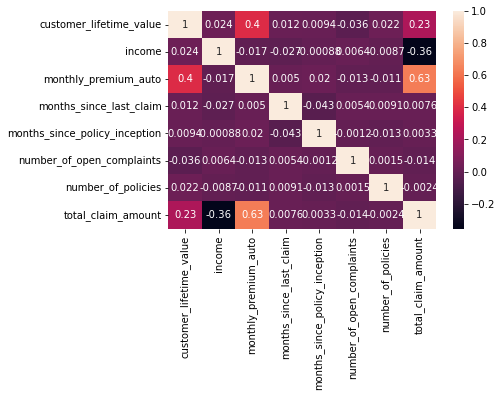

In [20]:
correlations_matrix = customer_df_num.corr() 
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# With respect with total_claim_amount: relative high correlation with monthly_premium_auto, 
# some correlation with customer_lifetime_value, and negative correlation with income.

In [21]:
# 8.1. Create a function to plot every discrete variable
def plot_discrete_variables (df):
    for column in df.columns:
        sns.displot(df[column])
        plt.show()

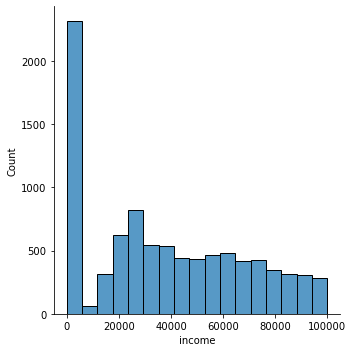

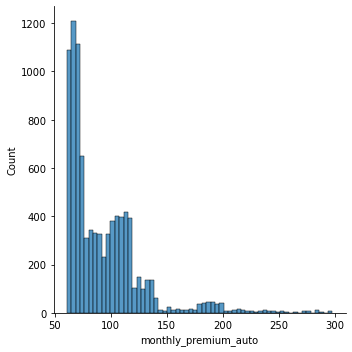

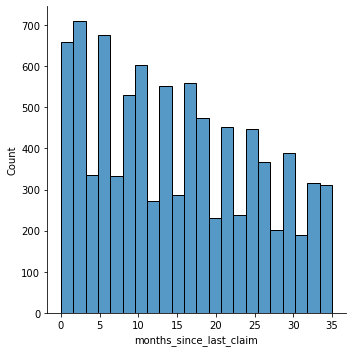

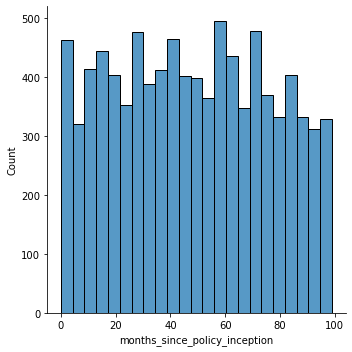

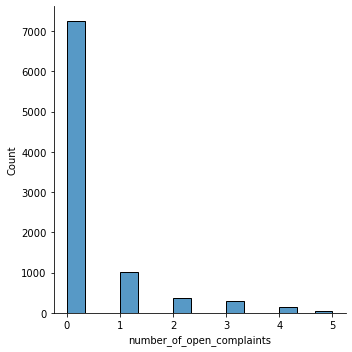

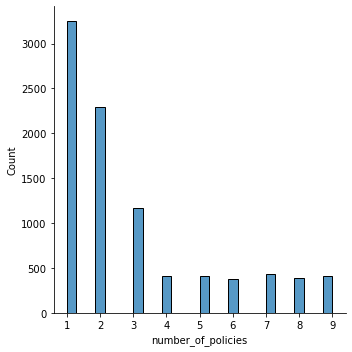

In [22]:
plot_discrete_variables (discrete_df)

In [23]:
# 8.2. Create a function to plot every continuous variable
def plot_continuous_variables (df):
    for column in df.columns:
        sns.displot(df[column])
        plt.show()

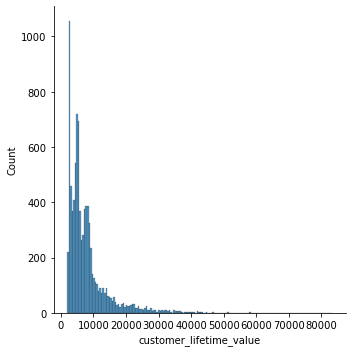

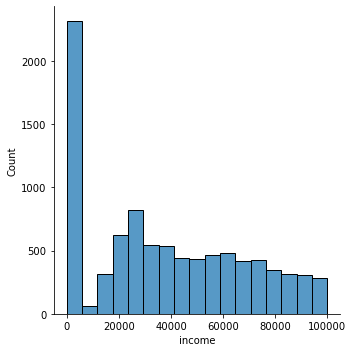

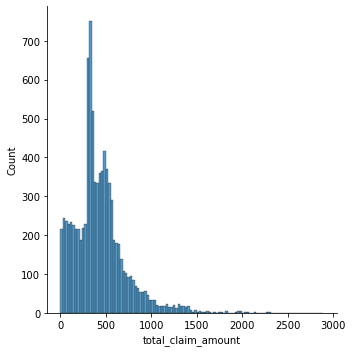

In [134]:
plot_continuous_variables (continuous_df)

In [24]:
# 9. Comment what you can see in the plots
# Some variables (customer_lifetime_value and total_claim_amount) seem to have a shape similar to a normal distributions. 

<AxesSubplot:ylabel='income'>

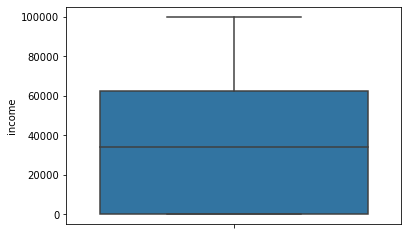

In [25]:
# 10. Look for outliers in the continuous variables
sns.boxplot(y=customer_df_num['income'])
# No outliers found.

<AxesSubplot:ylabel='customer_lifetime_value'>

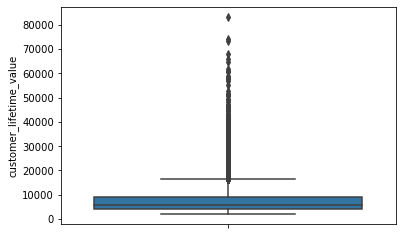

In [26]:
sns.boxplot(y=customer_df_num['customer_lifetime_value'])

In [27]:
iqr = np.percentile(customer_df_num['customer_lifetime_value'],75) - np.percentile(customer_df_num['customer_lifetime_value'],25)
upper_limit = np.percentile(customer_df_num['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df_num['customer_lifetime_value'],25) - 1.5*iqr
outliers=customer_df_num[(customer_df_num['customer_lifetime_value']>upper_limit)]
#outliers=customer_df_num[(customer_df_num['customer_lifetime_value']<lower_limit)]
outliers.shape
# 817 outliers above upper limit. No outliers below lower limit

(817, 8)

<AxesSubplot:ylabel='total_claim_amount'>

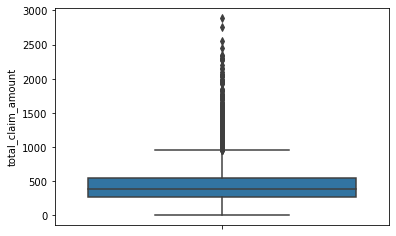

In [28]:
sns.boxplot(y=customer_df_num['total_claim_amount'])

In [29]:
iqr = np.percentile(customer_df_num['total_claim_amount'],75) - np.percentile(customer_df_num['total_claim_amount'],25)
upper_limit = np.percentile(customer_df_num['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df_num['total_claim_amount'],25) - 1.5*iqr
outliers=customer_df_num[(customer_df_num['total_claim_amount']>upper_limit)]
#outliers=customer_df_num[(customer_df_num['customer_lifetime_value']<lower_limit)]
outliers.shape
# 453 outliers above upper limit. No outliers below lower limit

(453, 8)

In [30]:
# 11. Did you find outliers? Comment what you will do with them
# There are outliers for customer_lifetime_value (almost 9% of data) and total_claim_amount (5%)
# I find no reason to drop the outliers. They represent a significant amount of customers, and might be
# an interest subset of clients to target.

In [160]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them
customer_df_num.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [31]:
# No NaN values found in data